<a href="https://colab.research.google.com/github/sergiyenkoalina/machine-learning-course/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
df.Price.describe()

,Price
count,1.000000e+02
mean,1.574000e+06
std,1.000265e+06
min,4.500000e+05
25%,7.000000e+05
50%,1.300000e+06
75%,2.500000e+06
max,4.000000e+06


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [7]:
df.Brand.value_counts()

,count
Brand,
Ford,11
Hyundai,11
Tata,11
Toyota,10
Volkswagen,10
Audi,10
BMW,10
Mercedes,10
Honda,6


In [8]:
df.Model.nunique()

58

In [9]:
df.Model.value_counts()

,count
Model,
Mustang,3
Altroz,3
C-Class,3
Verna,3
Fortuner,2
S-Cross,2
Vitara,2
WR-V,2
Ameo,2


In [10]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [11]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

```
В наборі даних 8 числових і 5 категоріальних колонок, з них:
- 2 бінарні (мають лише 2 значення): Transmission, Fuel_Type
- 2 мультикатегоріальних (більше 7 значень) зі значеннями, для яких немає відношення порядку: Model, Brand
- 1 колонка, в якій можна встановити відношення порядку або перевести у числову колонку: Owner_Type
```



**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [13]:
X = df.drop(columns=['Car_ID', 'Price'])
X.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5


In [14]:
y=df.Price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [16]:
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48


In [17]:
df.Transmission.value_counts( )

,count
Transmission,
Automatic,57
Manual,43


In [18]:
ftype_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type_codes'] = X_train.Fuel_Type.map(ftype_codes)
X_test['Fuel_Type_codes'] = X_test.Fuel_Type.map(ftype_codes)
X_train.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1


In [19]:
transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(transmission_codes)
X_train.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


In [20]:
one_hot_enc = preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [21]:
brand_train = X_train[['Brand']]
brand_test = X_test[['Brand']]

In [22]:
one_hot_enc = preprocessing.OneHotEncoder()
brand_train_encoded = one_hot_enc.fit_transform(brand_train).toarray()
brand_test_encoded = one_hot_enc.transform(brand_test).toarray()

In [23]:
one_hot_enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [24]:
X_train[one_hot_enc.categories_[0]] = brand_train_encoded
X_test[one_hot_enc.categories_[0]] = brand_test_encoded

In [25]:
X_test.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Результат після трансформацій:

In [27]:
#видалення стовпця 'Mahindra' для уникнення мультиколінеарності через one hot encoder
X_train=X_train.drop(columns=['Mahindra'])
X_test=X_test.drop(columns=['Mahindra'])

In [28]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [29]:
X_train=X_train.select_dtypes(include='number')
X_test=X_test.select_dtypes(include='number')

In [30]:
X_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
92,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [31]:
full_train = pd.concat([X_train, y_train], axis=1)
full_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [32]:
corr = full_train.corr()
corr.style.background_gradient()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_codes,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_codes,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


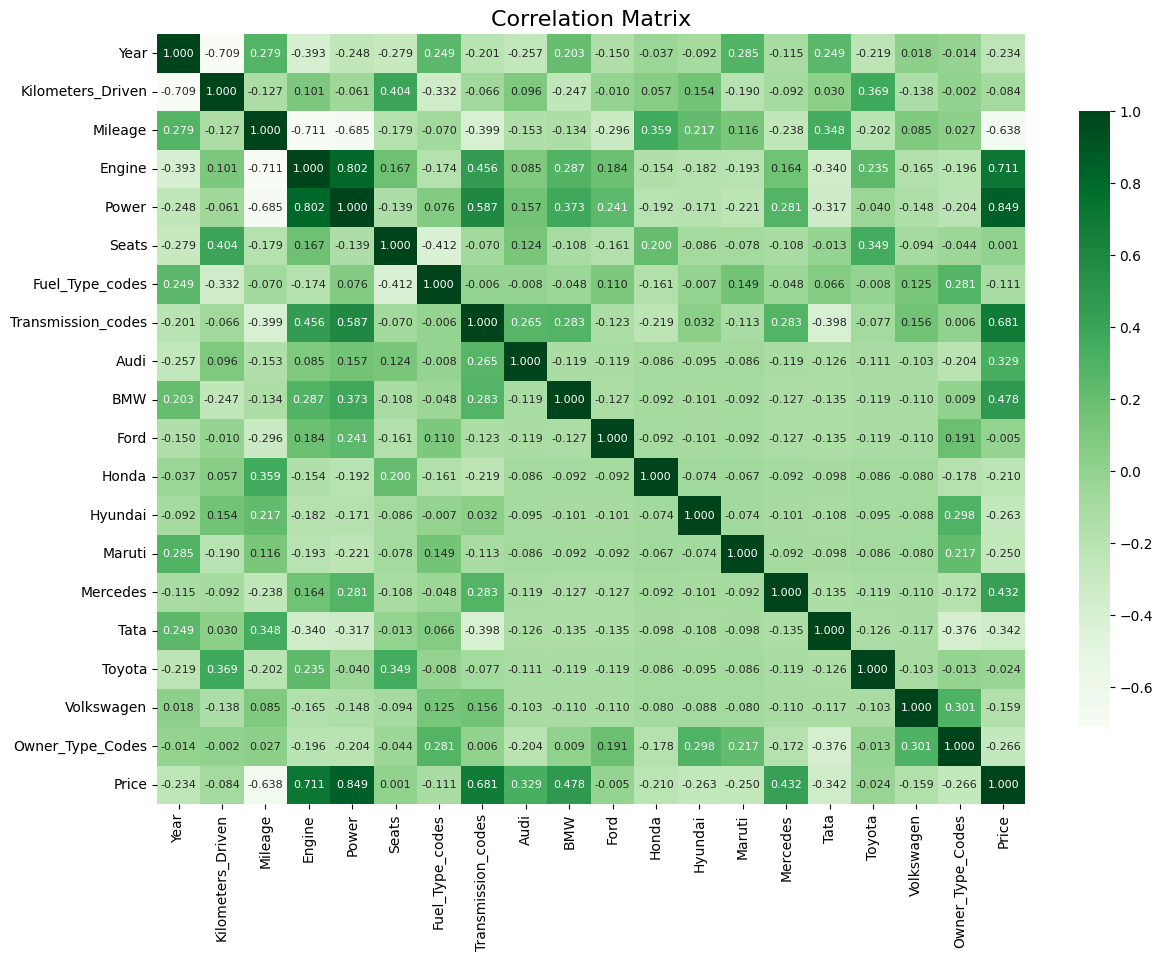

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap='Greens',
    annot=True,
    fmt=".3f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**Висновок**:
Колонки, які корелюють з цільовою змінною на більш ніж 0.5 за модулем:
Позитивна кореляція:
* 0.85 Power
* 0.71 Engine
* 0.68 Transmission_Codes

Негативна кореляція:
* -0.64 Mileage

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [34]:
model = LinearRegression().fit(X_train, y_train)

In [35]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [36]:
train_loss = root_mean_squared_error(y_train, predictions_train)
test_loss = root_mean_squared_error(y_test, predictions_test)
print('Train loss:', train_loss)
print('Test loss:', test_loss)

Train loss: 210342.80162046416
Test loss: 259601.26542723595


In [37]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f"R2 (Train): {r2_train}")
print(f"R2 (Test): {r2_test}")

R2 (Train): 0.9586083106020877
R2 (Test): 0.8509832680786684


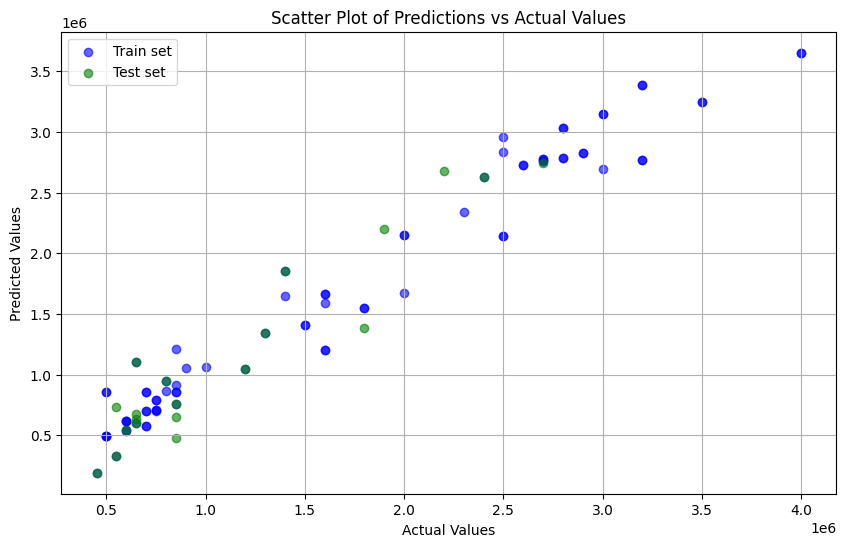

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, color='blue', alpha=0.6, label='Train set')
plt.scatter(y_test, predictions_test, color='green', alpha=0.6, label='Test set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_test_scaled = scaler.transform(X_test)

In [41]:
column_names = X_train.columns.tolist()

In [42]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=column_names)

In [43]:
scaled_model = LinearRegression().fit(X_train_scaled_df, y_train)
predictions_train_scaled = scaled_model.predict(X_train_scaled_df)
predictions_test_scaled  = scaled_model.predict(X_test_scaled_df)

In [44]:
train_scaled_loss = root_mean_squared_error(y_train, predictions_train_scaled)
test_scaled_loss = root_mean_squared_error(y_test, predictions_test_scaled)
print('Train scaled loss:', train_scaled_loss)
print('Test scaled loss:', test_scaled_loss)

Train scaled loss: 210342.80162046402
Test scaled loss: 259601.26542723452


In [45]:
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(scaled_model.coef_, scaled_model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
19,1,1.680000e+06
4,Power,5.000005e+05
14,Mercedes,4.135830e+05
9,BMW,4.124304e+05
8,Audi,4.001147e+05
16,Toyota,2.116110e+05
15,Tata,1.482972e+05
7,Transmission_codes,1.151534e+05
11,Honda,9.341396e+04
17,Volkswagen,8.932698e+04


Напрямки дії найважливіших коефіцієнтів:

* Year:
Рік має негативний вплив, оскільки старіші автомобілі дешевші.

* Power:
Більша потужність двигуна асоціюється з дорожчими автомобілями.

* Fuel_Type_codes:
Тип пального може впливати на ціну.

* Transmission_codes:
Автоматичні коробки передач зазвичай дорожчі, тому позитивний вплив логічний.

* Марки автомобілів (наприклад, BMW, Audi, Mercedes):
Преміальні бренди мають значний позитивний вплив, що очікувано.

* Також є великий вплив вільного коефіцієнта, це варто було б дослідити додатково

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [46]:
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [47]:
X_train_sm = sm.add_constant(X_train_scaled_df)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
results.params

,0
const,1.680000e+06
Year,-1.160426e+04
Kilometers_Driven,-9.971396e+04
Mileage,-1.318846e+05
Engine,-2.468308e+04
Power,5.000005e+05
Seats,-1.744049e+03
Fuel_Type_codes,-1.852458e+05
Transmission_codes,1.151534e+05
Audi,4.001147e+05


In [48]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.34e-34
Time:                        13:36:26   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.72

Ознаки, що є стат значущими на рівні значущості 0.05:

 * const
 * Mileage
 * Power
 * Fuel_Type_codes
 * Transmission_codes
 * Audi
 * BMW
 * Mercedes
 * Tata
 * Toyota

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [51]:
selected_columns = [
    "const",
    "Mileage",
    "Power",
    "Fuel_Type_codes",
    "Transmission_codes",
    "Audi",
    "BMW",
    "Mercedes",
    "Tata",
    "Toyota"
]

# Вибір стовпців та створення нового DataFrame
X_stat_significant = X_train_sm[selected_columns]
X_stat_significant.head()

,const,Mileage,Power,Fuel_Type_codes,Transmission_codes,Audi,BMW,Mercedes,Tata,Toyota
0,1.0,0.274862,-0.231967,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.377964,-0.333333
1,1.0,-0.018324,0.247012,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.377964,-0.333333
2,1.0,-0.604696,0.910213,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.377964,-0.333333
3,1.0,0.274862,-0.784634,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.377964,-0.333333
4,1.0,-1.484254,0.910213,0.975305,0.795395,-0.333333,-0.356034,2.808717,-0.377964,-0.333333


In [60]:
model_sm_significant = sm.OLS(y_train, X_stat_significant)
results = model_sm_significant.fit()
results.params

,0
const,1.680000e+06
Mileage,-1.044052e+05
Power,4.814272e+05
Fuel_Type_codes,-1.226522e+05
Transmission_codes,1.179065e+05
Audi,3.169849e+05
BMW,3.605592e+05
Mercedes,3.479902e+05
Tata,3.916466e+04
Toyota,1.061568e+05


In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.80e-41
Time:                        14:08:34   Log-Likelihood:                -1103.2
No. Observations:                  80   AIC:                             2226.
Df Residuals:                      70   BIC:                             2250.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.82

Попередня модель мала показники:

R-squared:                       0.959

Adj. R-squared:                  0.946

Тоді як показники останньої навченої моделі

R-squared:                       0.948

Adj. R-squared:                  0.941

**Висновок**: показники не мали значної зміни при застосуванні у моделі тільки статистично значимих ознаках.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [59]:
selected_columns = [
    "const",
    "Kilometers_Driven",
    "Ford",
    "Honda",
    "Volkswagen",
    "Mileage",
    "Power",
    "Fuel_Type_codes",
    "Transmission_codes",
    "Audi",
    "BMW",
    "Mercedes",
    "Tata",
    "Toyota"
]

# Вибір стовпців та створення нового DataFrame
X_stat_soft_significant_ = X_train_sm[selected_columns]
X_stat_soft_significant_.head()

,const,Kilometers_Driven,Ford,Honda,Volkswagen,Mileage,Power,Fuel_Type_codes,Transmission_codes,Audi,BMW,Mercedes,Tata,Toyota
0,1.0,-0.693871,-0.356034,-0.258199,3.229330,0.274862,-0.231967,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.377964,-0.333333
1,1.0,-0.039533,-0.356034,-0.258199,-0.309662,-0.018324,0.247012,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.377964,-0.333333
2,1.0,-0.039533,-0.356034,-0.258199,-0.309662,-0.604696,0.910213,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.377964,-0.333333
3,1.0,0.396692,-0.356034,-0.258199,3.229330,0.274862,-0.784634,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.377964,-0.333333
4,1.0,-0.257646,-0.356034,-0.258199,-0.309662,-1.484254,0.910213,0.975305,0.795395,-0.333333,-0.356034,2.808717,-0.377964,-0.333333


In [62]:
model_sm_soft_significant = sm.OLS(y_train, X_stat_soft_significant_)
results = model_sm_soft_significant.fit()
results.params

,0
const,1.680000e+06
Kilometers_Driven,-7.987633e+04
Ford,6.724343e+04
Honda,5.924808e+04
Volkswagen,6.729085e+04
Mileage,-1.212860e+05
Power,4.592744e+05
Fuel_Type_codes,-1.540782e+05
Transmission_codes,1.228692e+05
Audi,3.657323e+05


In [63]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     113.2
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           7.77e-40
Time:                        14:09:34   Log-Likelihood:                -1095.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      66   BIC:                             2252.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.64

**Висновок**:
Показники останньої моделі не значно змінились.
Перша модель має великий різик перенавчання через свою складність.
Друга модель більш узагальнена через меншу кількість ознак.
Я би обрала залишити третю модель, оскільки
вона має найвищий скоригований R**2 серед простіших моделей. Також пом'якшені критерії дозволяють зберегти більшу частину варіацій цільової змінної, але без надмірної складності.